### **Import Needed Modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC


In [3]:
sns.set_palette('viridis')
sns.set_style("whitegrid")

In [4]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

### **Exploratory Data Analysis and Wrangling**

**Download dataset from this [here](https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions) and read the data description**

**Read data**

In [5]:
train_df = pd.read_csv('bank dataset/train.csv')
test_df = pd.read_csv('bank dataset/test.csv')

**Get sample**

In [6]:
# Train data sample
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
# Test data sample
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


**Get data informaion**

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Data is clean: no nans

#### **Age Feature - The age of the customer.**

In [9]:
# Get statistical analysis for age column
train_df['age'].describe()

count   45211
mean       41
std        11
min        18
25%        33
50%        39
75%        48
max        95
Name: age, dtype: float64

from mean and median values: age column is normally distributed

**Plot hisogram to show the frequency distribution of a ages**
    
    Note: use palette='viridis' in all of your graphs for better color representation.

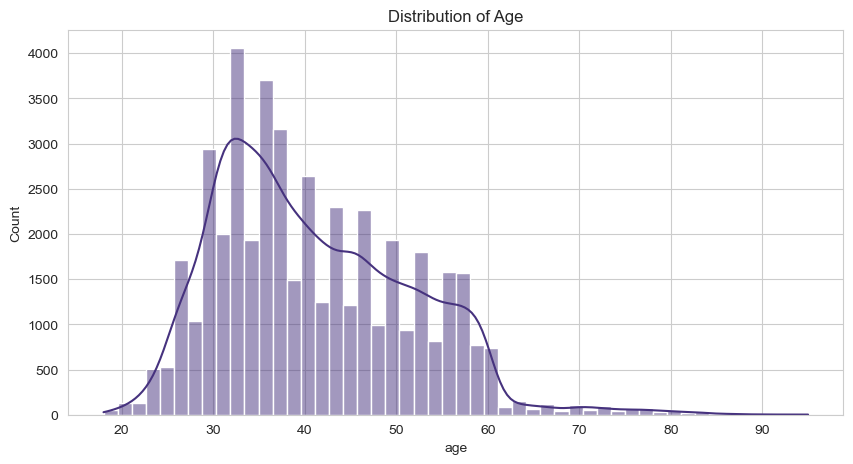

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x='age', kde=True, bins=50)
plt.title('Distribution of Age')
plt.show()

there are some outliers in the age column

#### **Job Feature - The occupation/employment status of the customer.**

**Show the distribution of job column**

In [11]:
train_df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

**Rename "unknown" values with "others"**

In [12]:

train_df['job'].replace('unknown', 'others', inplace=True)
train_df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
others            288
Name: job, dtype: int64

**Plot the distribution**

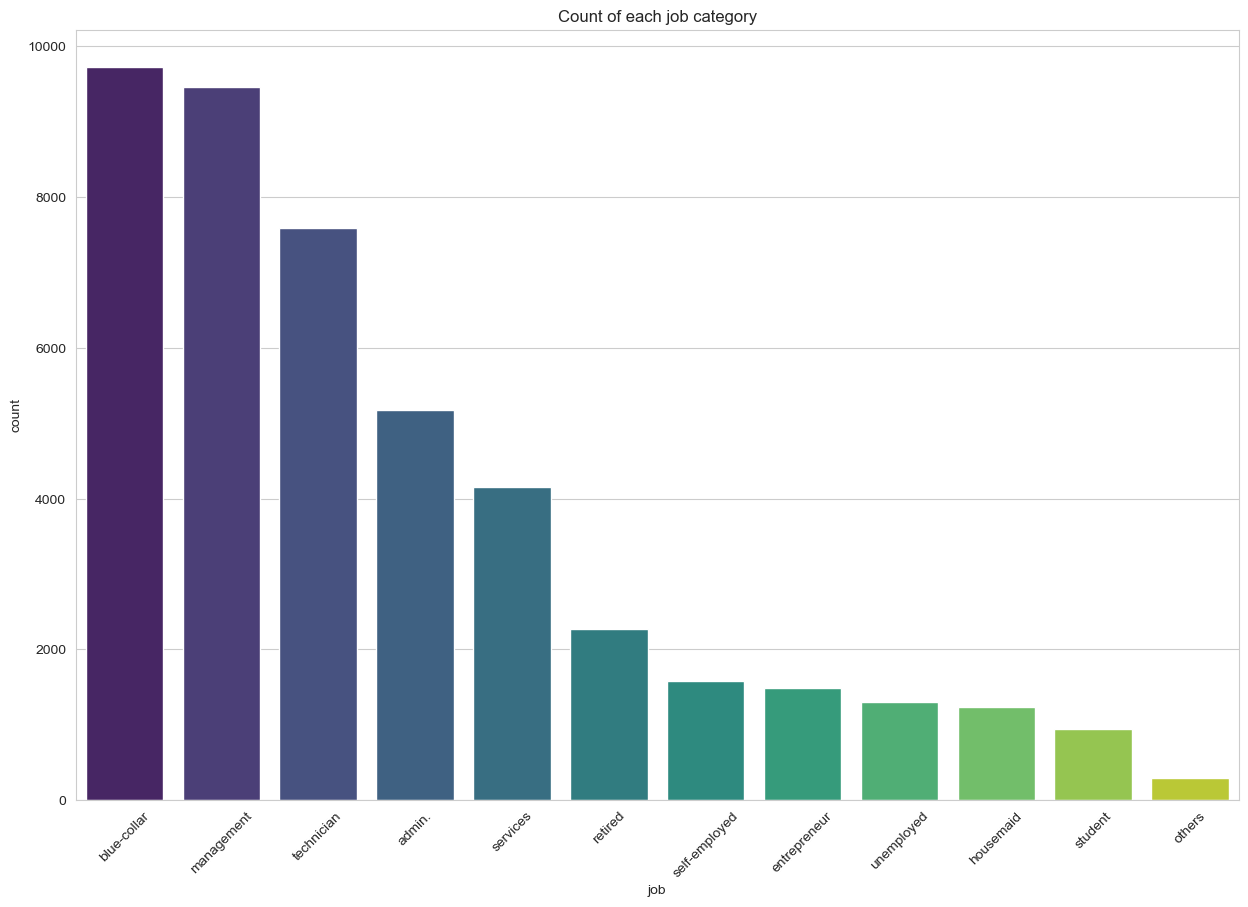

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['job'], order=train_df['job'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Count of each job category')
plt.show()

majority jobs are : blue-collar, management, technician

**Also, Don't forget to rename these values in test data.**

In [14]:
test_df['job'].replace('unknown', 'others',inplace=True)
test_df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
others            38
Name: job, dtype: int64

#### **Marital-Status Feature - The marital status of the customer.**

**Show the distribution of marital-status column**

In [15]:
train_df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

**Plot the distribution**

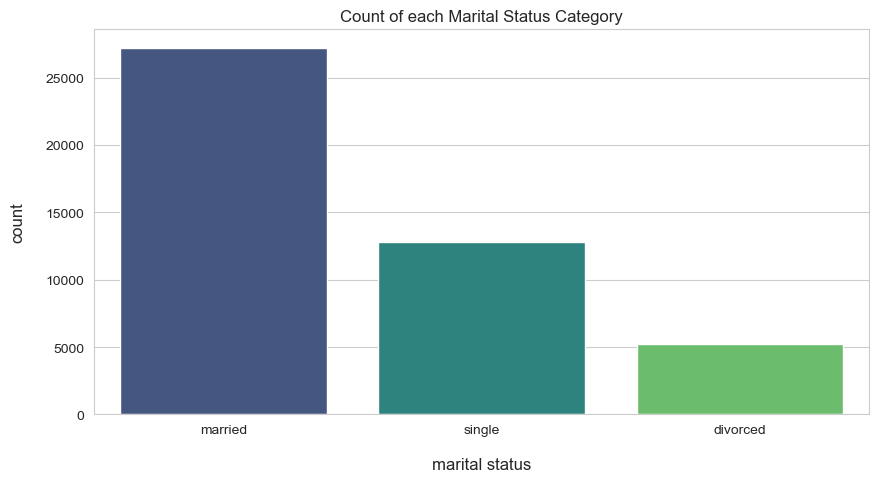

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_df['marital'], order=train_df['marital'].value_counts().index, palette='viridis')
plt.title('Count of each Marital Status Category')
plt.xlabel('marital status', labelpad=15, fontsize=12)
plt.ylabel('count', labelpad=15, fontsize=12)

plt.show()

major category in marital status is married

#### **Educational Feature - The education level attained by the customer.**

**Show the distribution of Education column**

In [17]:
train_df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

**Rename "unknown" values with "others"**

In [18]:
train_df['education'].replace('unknown', 'others', inplace=True)
train_df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
others        1857
Name: education, dtype: int64

**Show the distribution of education column**

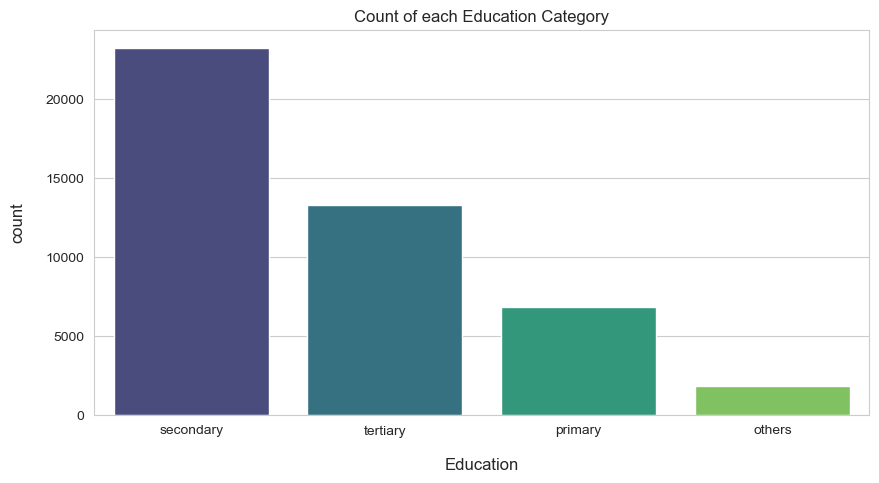

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_df['education'], order=train_df['education'].value_counts().index, palette='viridis')
plt.title('Count of each Education Category')
plt.xlabel('Education', labelpad=15, fontsize=12)
plt.ylabel('count', labelpad=15, fontsize=12)

plt.show()

the major category in education is secondary

**Also, Don't forget to rename these values in test data.**

In [20]:
test_df['education'].replace('unknown', 'others', inplace=True)
test_df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
others        187
Name: education, dtype: int64

#### **Credit in Default Feature - Whether the customer has credit in default or not.**

In [21]:
train_df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

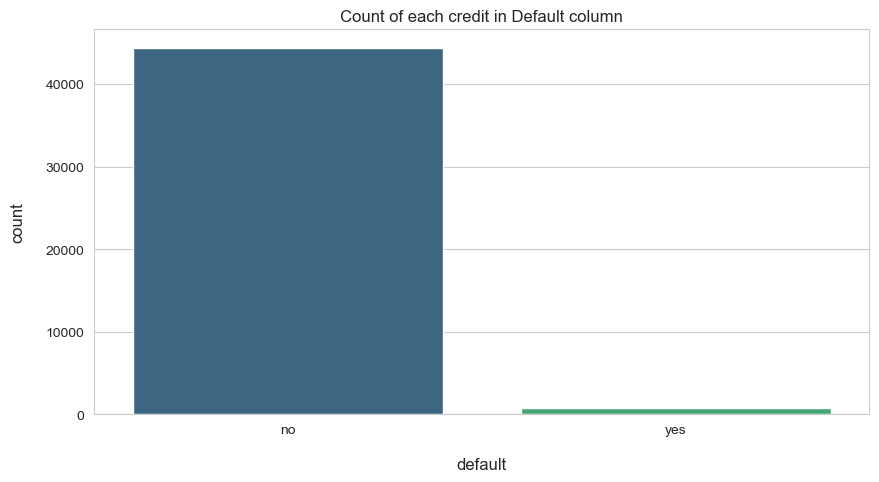

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_df['default'], order=train_df['default'].value_counts().index, palette='viridis')
plt.title('Count of each credit in Default column')
plt.xlabel('default', labelpad=15, fontsize=12)
plt.ylabel('count', labelpad=15, fontsize=12)
plt.show()

**This feature is worthless, the "yes" values is so poor, so I'll drop it.**

In [23]:
# drop default column in train data
train_df.drop(columns=['default'], axis=1,inplace=True)
train_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,others,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,others,single,others,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**Also, don't forget drop this column from test data.**

In [24]:
# drop default column in test data
test_df.drop(columns=['default'], axis=1,inplace=True)
test_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,1137,no,no,cellular,6,feb,129,4,211,3,other,no


#### **Balance Feature - The balance in the customer's account.**

In [25]:
train_df['balance'].describe()

count    45211
mean      1362
std       3045
min      -8019
25%         72
50%        448
75%       1428
max     102127
Name: balance, dtype: float64

**Plot the graph using [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) from seaborn**

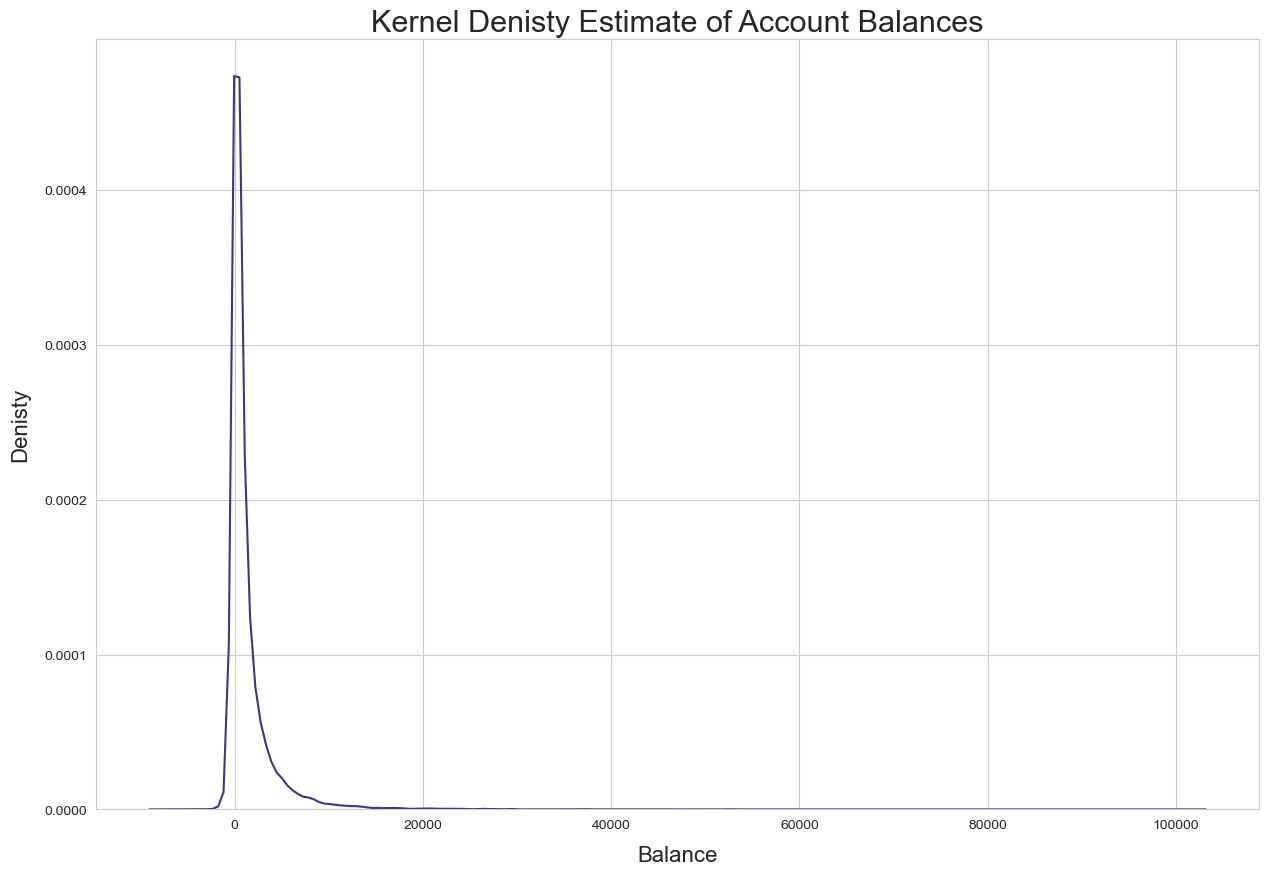

In [26]:
plt.figure(figsize=(15,10))
sns.kdeplot(train_df['balance'])
plt.xlabel('Balance', labelpad= 10, fontsize=16)
plt.ylabel('Denisty', labelpad=10, fontsize=16)
plt.title('Kernel Denisty Estimate of Account Balances',  fontsize=22)
plt.show()

    What do you say about this graph?

- The balance column is left skewed and the data is not normally distributed.
- There are many balance values less than 0

**Check for values under zero**

In [27]:
(train_df['balance']<=0).sum()

7280

**Define the percentile threshold for outliers - 95%**
- **All the data that above 95% will be considered outliers**

In [28]:
perc_95 = np.percentile(train_df['balance'], 95)
print(f'95th Percentile Value: {perc_95}')
outliers = (train_df['balance']>perc_95).sum()
print(f'Number of Potential Outliers: {outliers}')

95th Percentile Value: 5768.0
Number of Potential Outliers: 2260


- **The maximum value of 102127 is considerably higher than the 95th percentile (5768).**
- **Drop the values that above 5768.**

In [29]:
train_df.drop(train_df[train_df['balance']>perc_95].index, axis=0, inplace=True)

**Plot the Balance graph again using [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) from seaborn**

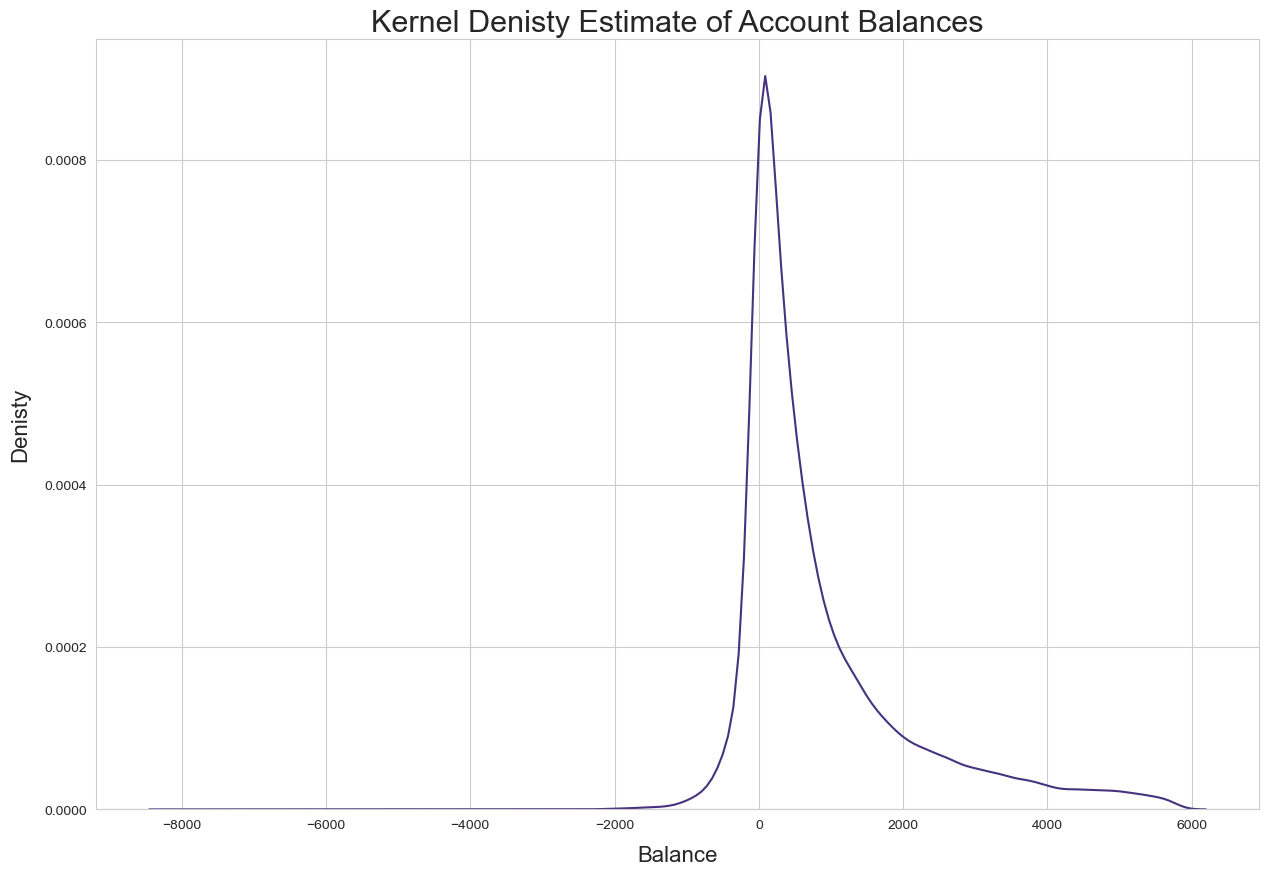

In [30]:
plt.figure(figsize=(15,10))
sns.kdeplot(train_df['balance'])
plt.xlabel('Balance', labelpad= 10, fontsize=16)
plt.ylabel('Denisty', labelpad=10, fontsize=16)
plt.title('Kernel Denisty Estimate of Account Balances',  fontsize=22)
plt.show()

**We have solved the skew in right side**

**Plot the [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) of this column using seaborn**

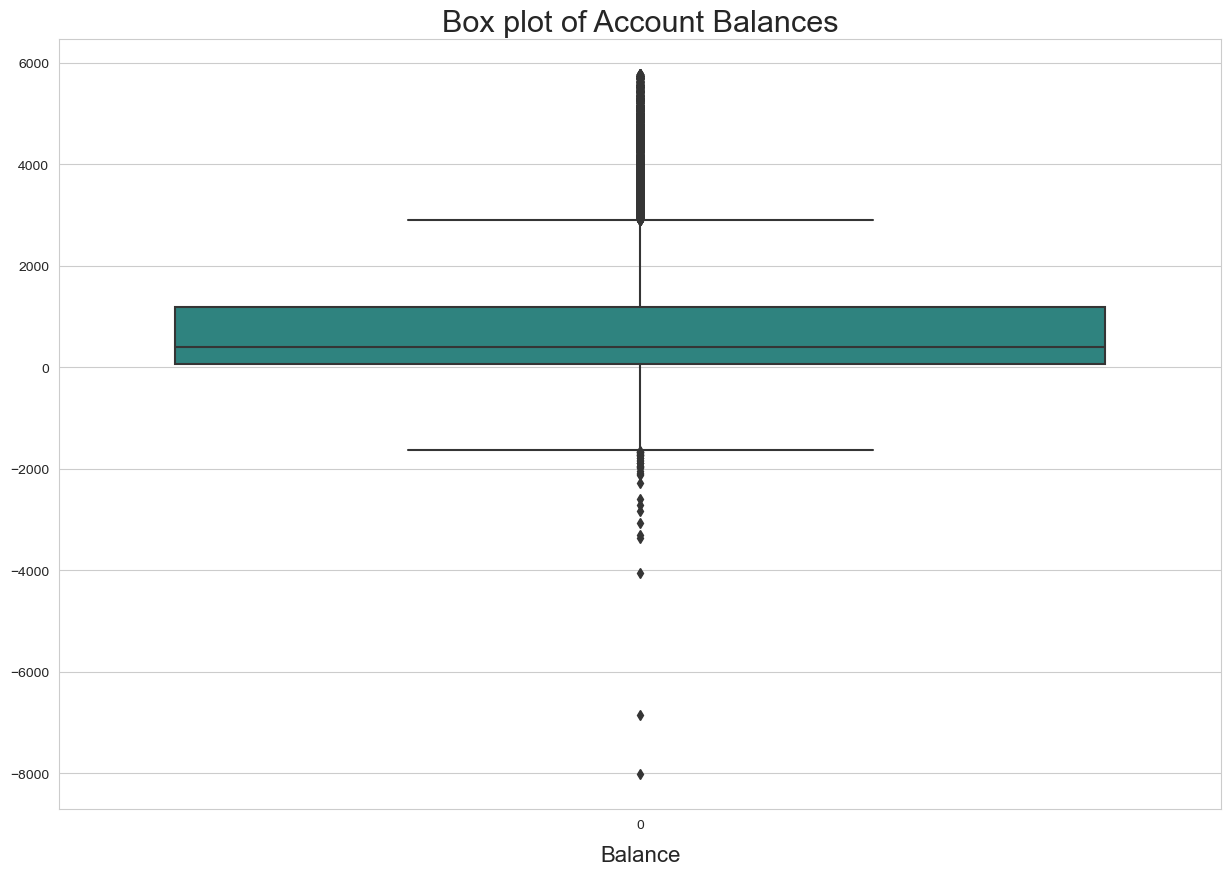

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(train_df['balance'], palette='viridis')
plt.xlabel('Balance', labelpad= 10, fontsize=16)
plt.title('Box plot of Account Balances',  fontsize=22)
plt.show()

**Define the percentile threshold for outliers - 5%**
- **All the data that under 5% will be considered outliers**

In [32]:
perc_5 = np.percentile(train_df['balance'],5)
print((train_df['balance']).min())
print(f'5th Percentile Value: {perc_5}')
outliers = (train_df['balance']<perc_5).sum()
print(f'Number of Potential Outliers: {outliers}')

-8019
5th Percentile Value: -191.0
Number of Potential Outliers: 2142


- **The minimum value of -8019 is considerably lower than the 5th percentile (-191).**
- **Drop the values that under -191.**

In [33]:
train_df.drop(train_df[train_df['balance']<perc_5].index, axis=0, inplace=True)

**Plot the Balance graph again using [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) from seaborn**

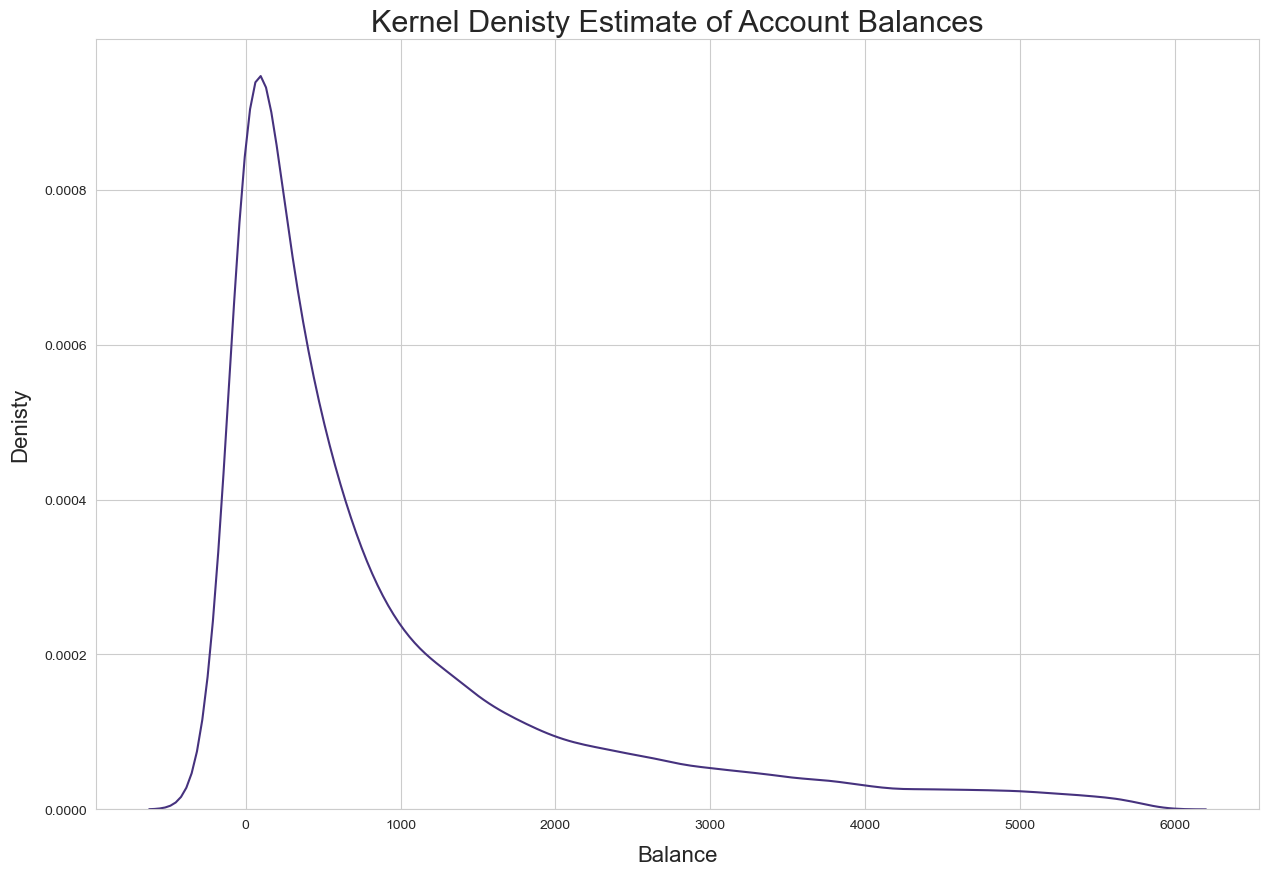

In [34]:
plt.figure(figsize=(15,10))
sns.kdeplot(train_df['balance'])
plt.xlabel('Balance', labelpad= 10, fontsize=16)
plt.ylabel('Denisty', labelpad=10, fontsize=16)
plt.title('Kernel Denisty Estimate of Account Balances',  fontsize=22)
plt.show()

    What do you think about the graph now?

The graph became left skewed

**Plot the [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) again using seaborn**

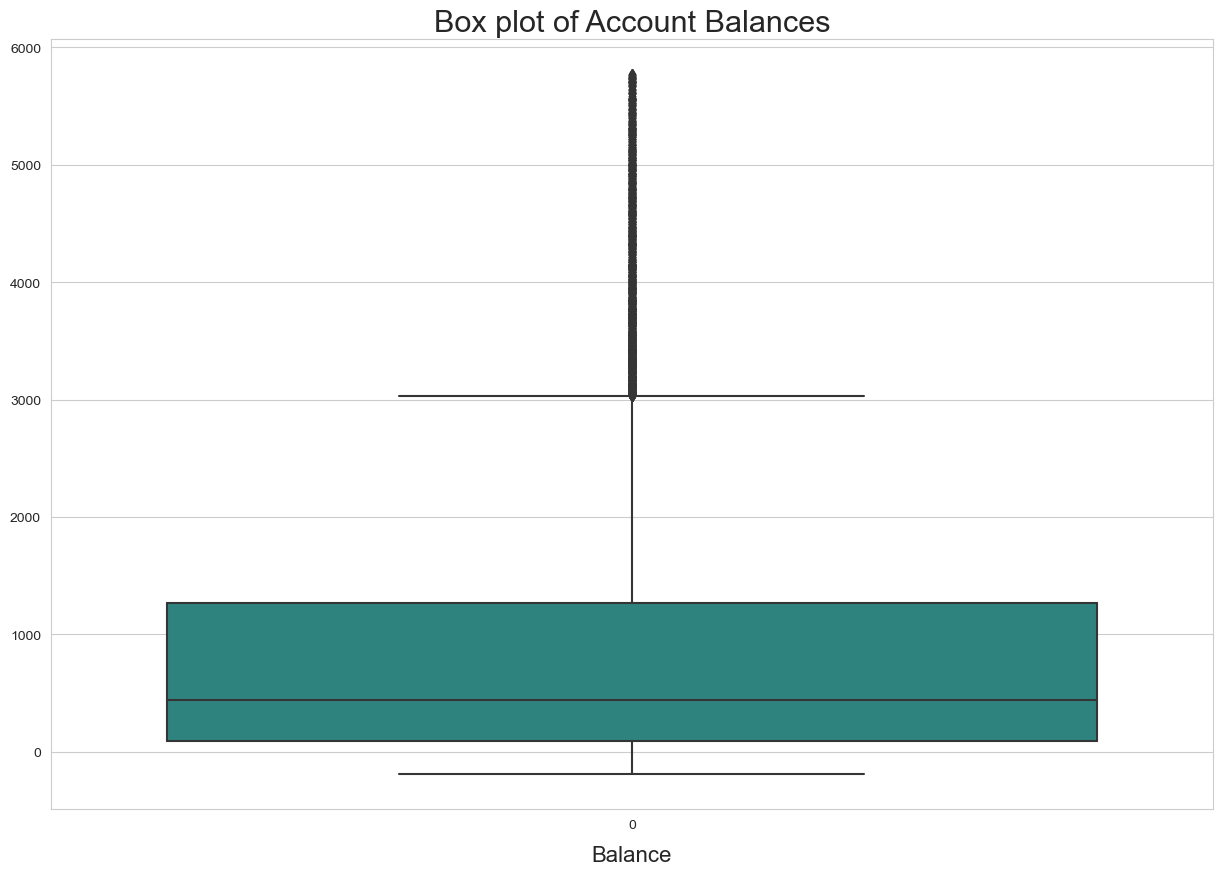

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(train_df['balance'], palette='viridis')
plt.xlabel('Balance', labelpad= 10, fontsize=16)
plt.title('Box plot of Account Balances',  fontsize=22)
plt.show()

#### **Housing Loan Feature - Whether the customer has a housing loan or not.**

In [36]:
train_df['housing'].value_counts()

yes    22454
no     18355
Name: housing, dtype: int64

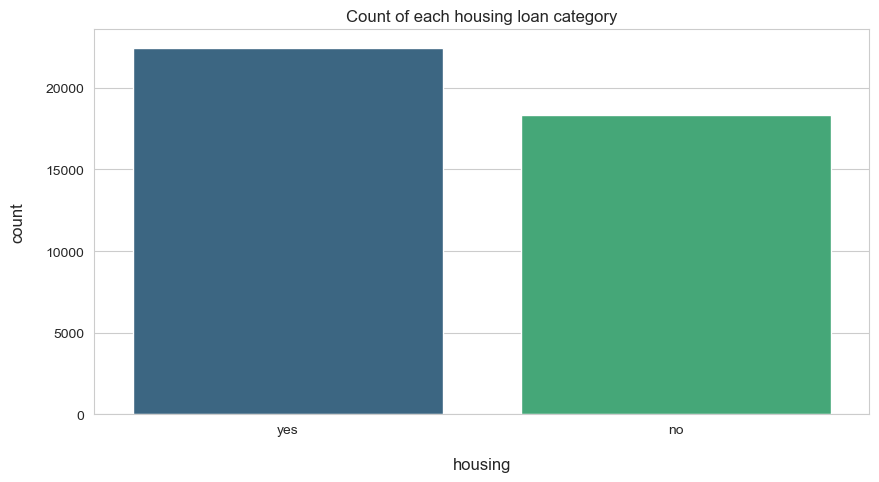

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_df['housing'], order=train_df['housing'].value_counts().index, palette='viridis')
plt.title('Count of each housing loan category')
plt.xlabel('housing', labelpad=15, fontsize=12)
plt.ylabel('count', labelpad=15, fontsize=12)
plt.show()

#### **Loan Feature - Whether the customer has a loan or not.**

In [38]:
train_df['loan'].value_counts()

no     34469
yes     6340
Name: loan, dtype: int64

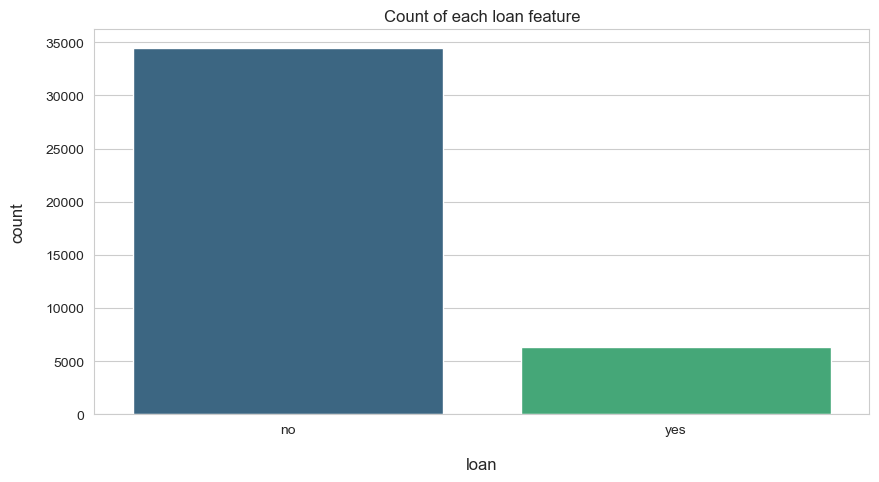

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_df['loan'], order=train_df['loan'].value_counts().index, palette='viridis')
plt.title('Count of each loan feature')
plt.xlabel('loan', labelpad=15, fontsize=12)
plt.ylabel('count', labelpad=15, fontsize=12)
plt.show()

#### **Contact Feature - Type of communication used to contact customers**

In [40]:
train_df['contact'].value_counts()

cellular     26536
unknown      11628
telephone     2645
Name: contact, dtype: int64

**Rename "unknown" values with "others".**

In [41]:
train_df['contact'].replace('unknown','others', inplace =True)
train_df['contact'].value_counts()

cellular     26536
others       11628
telephone     2645
Name: contact, dtype: int64

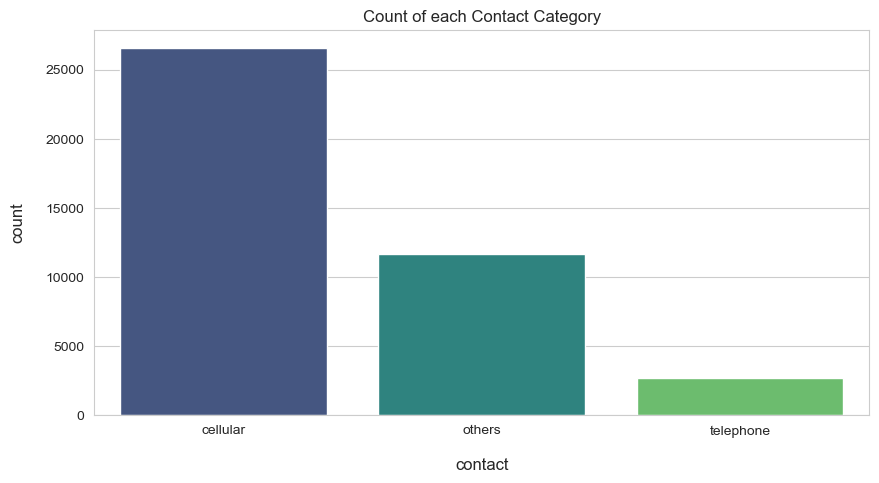

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_df['contact'], order=train_df['contact'].value_counts().index, palette='viridis')
plt.title('Count of each Contact Category')
plt.xlabel('contact', labelpad=15, fontsize=12)
plt.ylabel('count', labelpad=15, fontsize=12)
plt.show()

**Also, Don't forget to rename these values in test data.**

In [43]:
test_df['contact'].replace('unknown','others', inplace =True)
test_df['contact'].value_counts()

cellular     2896
others       1324
telephone     301
Name: contact, dtype: int64

#### **Day Feature - Day of the month when customers were last contacted.**

In [44]:
train_df['day'].value_counts()


20    2425
18    2060
17    1790
5     1770
6     1768
21    1762
8     1702
14    1665
7     1654
28    1645
29    1597
19    1551
15    1534
12    1469
13    1445
9     1424
30    1423
11    1339
4     1322
16    1309
2     1173
27     960
3      959
26     892
22     832
23     816
25     768
31     573
10     474
24     417
1      291
Name: day, dtype: int64

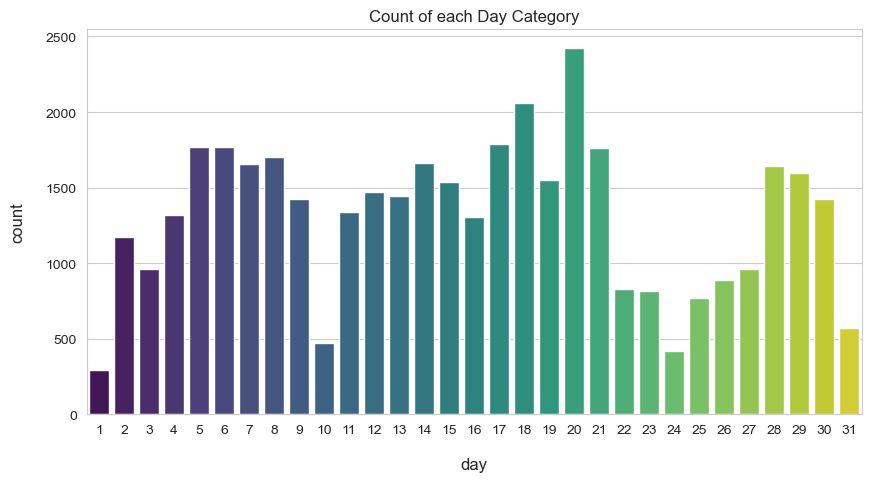

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_df['day'], palette='viridis')
plt.title('Count of each Day Category')
plt.xlabel('day', labelpad=15, fontsize=12)
plt.ylabel('count', labelpad=15, fontsize=12)
plt.show()

#### **Month Feature - last contact month of year.**

In [46]:
train_df['month'].value_counts()

may    12311
jul     6237
aug     5763
jun     4795
nov     3387
apr     2711
feb     2455
jan     1323
oct      668
sep      533
mar      430
dec      196
Name: month, dtype: int64

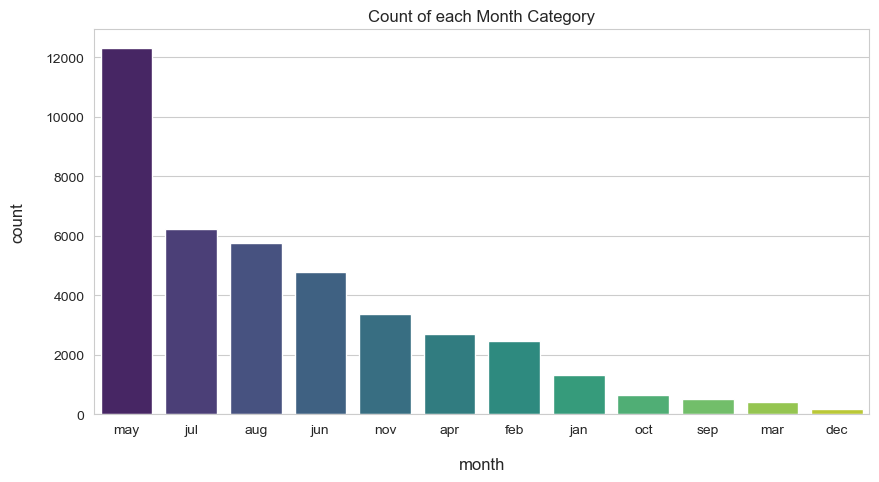

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_df['month'], order=train_df['month'].value_counts().index, palette='viridis')
plt.title('Count of each Month Category')
plt.xlabel('month', labelpad=15, fontsize=12)
plt.ylabel('count', labelpad=15, fontsize=12)
plt.show()

may is highly remarkable for being the last contact month

#### **Duration Feature - last contact duration, in seconds**

**Display statistical analysis for Duration column**

In [48]:
train_df['duration'].describe()

count   40809
mean      258
std       257
min         0
25%       103
50%       180
75%       318
max      3881
Name: duration, dtype: float64

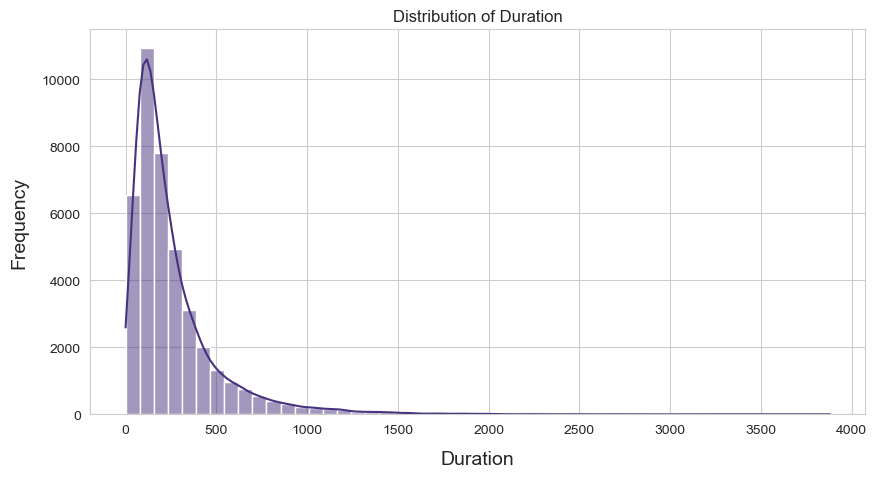

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x='duration', kde=True, bins=50)
plt.title('Distribution of Duration')
plt.ylabel('Frequency', labelpad=10, fontsize=14)
plt.xlabel('Duration', labelpad=10, fontsize=14)

plt.show()

The duration is left skewed with outliers

#### **Campaign Feature - number of contacts performed during this campaign and for this client**

In [50]:
train_df['campaign'].describe()

count   40809
mean        3
std         3
min         1
25%         1
50%         2
75%         3
max        58
Name: campaign, dtype: float64

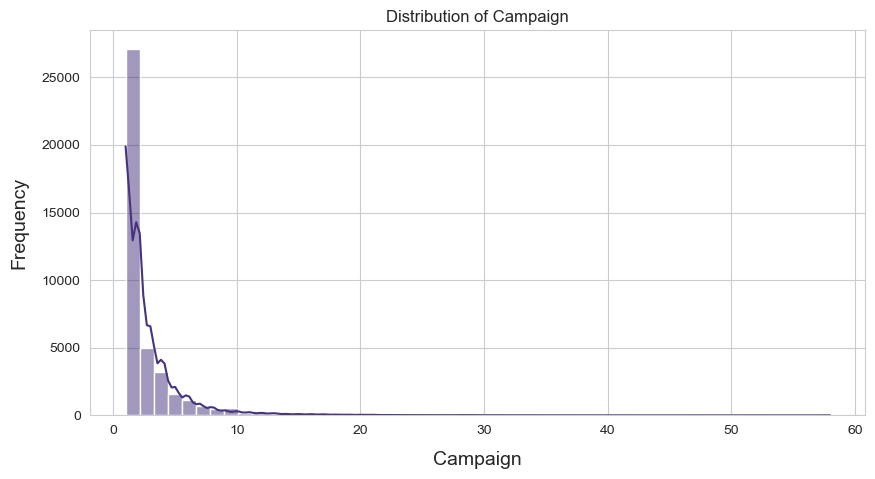

In [51]:
plt.figure(figsize=(10,5))
sns.histplot(data=train_df, x='campaign', kde=True, bins=50)
plt.title('Distribution of Campaign')
plt.ylabel('Frequency', labelpad=10, fontsize=14)
plt.xlabel('Campaign', labelpad=10, fontsize=14)

plt.show()

campaign is also left skewed with outliers

#### **Passed Days - number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted)**

In [52]:
# Get the values that doesn't -1 
filtered_data = train_df[train_df['pdays'] != -1]
filtered_data

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24064,33,services,married,secondary,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
24080,56,technician,married,secondary,589,yes,no,others,23,oct,518,1,147,2,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [53]:
# Get statistical summary
filtered_data['pdays'].describe()

count   7495
mean     224
std      116
min        1
25%      131
50%      195
75%      326
max      871
Name: pdays, dtype: float64

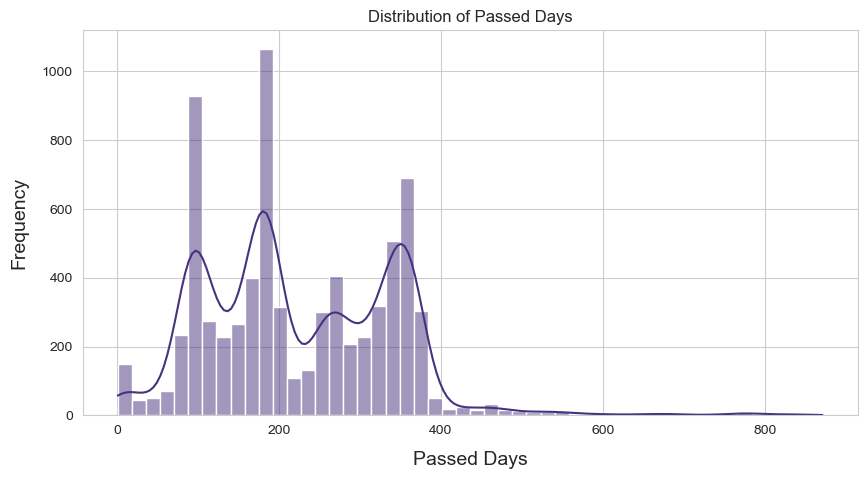

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(data=filtered_data, x='pdays', kde=True, bins=50)
plt.title('Distribution of Passed Days')
plt.ylabel('Frequency', labelpad=10, fontsize=14)
plt.xlabel('Passed Days', labelpad=10, fontsize=14)

plt.show()

#### **Previous Contacts - number of contacts performed before this campaign and for this client.**

In [55]:
train_df['previous'].value_counts()

0      33314
1       2522
2       1896
3       1036
4        651
5        418
6        255
7        187
8        126
9         79
10        62
11        61
12        41
13        31
14        18
15        18
17        13
16        12
19        10
20         7
23         7
22         6
24         5
27         5
18         4
21         4
29         3
25         3
38         2
37         2
30         2
51         1
275        1
26         1
58         1
28         1
32         1
40         1
55         1
41         1
Name: previous, dtype: int64

**This feature is useless, the most of values have 0 value, so drop it**

In [56]:
train_df.drop(columns='previous',  axis=1, inplace=True)

**Also, don't forget drop this column from test data.**

In [57]:
test_df.drop(columns='previous',  axis=1, inplace=True)

#### **Previous Outcome - outcome of the previous marketing campaign**

In [58]:
train_df['poutcome'].value_counts()

unknown    33319
failure     4406
other       1678
success     1406
Name: poutcome, dtype: int64

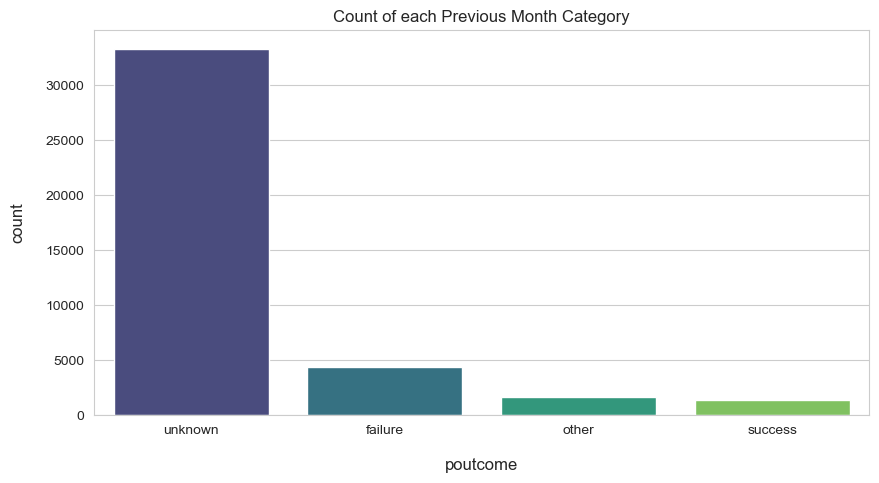

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_df['poutcome'], order=train_df['poutcome'].value_counts().index, palette='viridis')
plt.title('Count of each Previous Month Category')
plt.xlabel('poutcome', labelpad=15, fontsize=12)
plt.ylabel('count', labelpad=15, fontsize=12)
plt.show()

**This feature is useless, the most of values are unknowns, so drop it**

In [60]:
train_df.drop(columns='poutcome',axis=1, inplace=True)

**Also, don't forget drop this column from test data.**

In [61]:
test_df.drop(columns='poutcome',axis=1, inplace=True)


#### **Target Column - has the client subscribed a term deposit.**

In [62]:
train_df['y'].value_counts()

no     35977
yes     4832
Name: y, dtype: int64

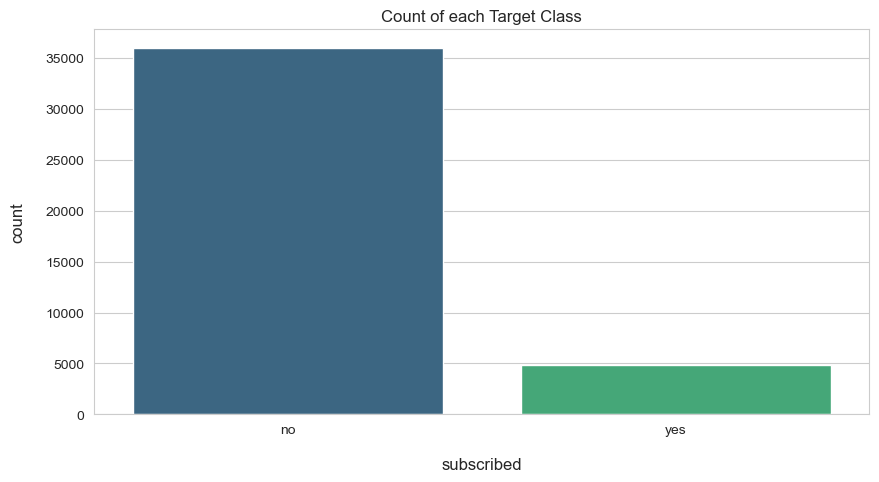

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_df['y'], order=train_df['y'].value_counts().index, palette='viridis')
plt.title('Count of each Target Class')
plt.xlabel('subscribed', labelpad=15, fontsize=12)
plt.ylabel('count', labelpad=15, fontsize=12)
plt.show()

#### **Create a Label Encoder model to convert the categorical values into numeric**

In [64]:
def columns_lencoder(data):
    # data = object_data
    le = LabelEncoder()
    for col in data.columns:
        data[col] = le.fit_transform(data[col])
    return data
object_data = train_df.select_dtypes(include=['object'])
train_df[object_data.columns] = columns_lencoder(object_data)

In [65]:
# Display new_data head values
train_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,58,4,1,3,2143,1,0,1,5,8,261,1,-1,0
1,44,10,2,2,29,1,0,1,5,8,151,1,-1,0
2,33,2,1,2,2,1,1,1,5,8,76,1,-1,0
3,47,1,1,0,1506,1,0,1,5,8,92,1,-1,0
4,33,5,2,0,1,0,0,1,5,8,198,1,-1,0


**Also, don't forget encode test data**

In [66]:
object_data = test_df.select_dtypes(include=['object'])
test_df[object_data.columns] = columns_lencoder(object_data)

In [67]:
test_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,30,11,1,1,1787,0,0,0,19,10,79,1,-1,0
1,33,8,1,2,4789,1,1,0,11,8,220,1,339,0
2,35,4,2,3,1350,1,0,0,16,0,185,1,330,0
3,30,4,1,3,1476,1,1,1,3,6,199,4,-1,0
4,59,1,1,2,0,1,0,1,5,8,226,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,8,1,2,-333,1,0,0,30,5,329,5,-1,0
4517,57,7,1,3,-3313,1,1,1,9,8,153,1,-1,0
4518,57,10,1,2,295,0,0,0,19,1,151,11,-1,0
4519,28,1,1,2,1137,0,0,0,6,3,129,4,211,0


#### **Get Features Correlation**

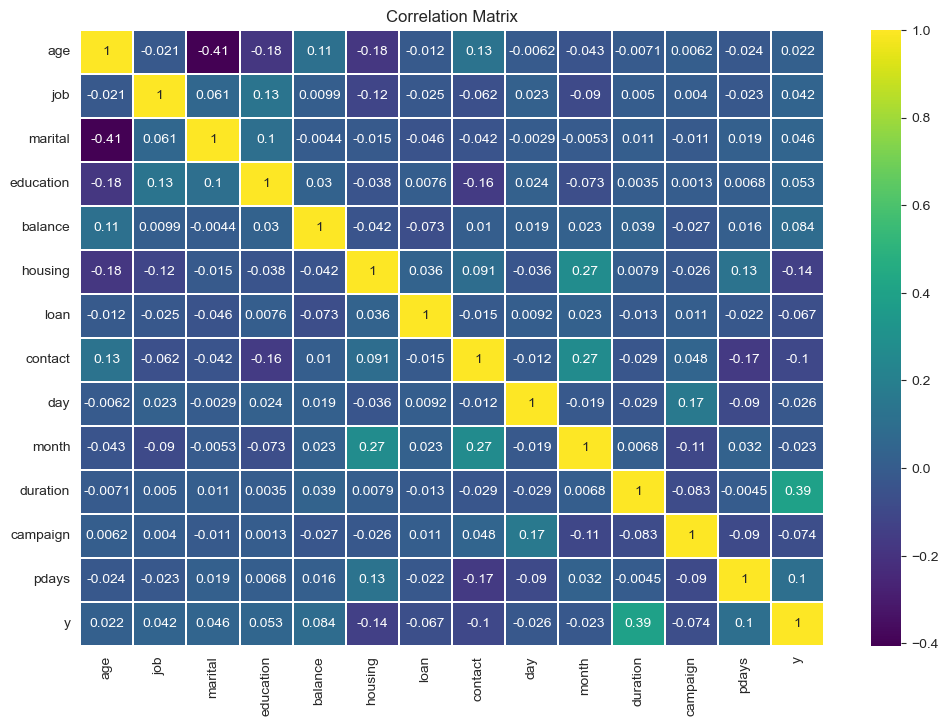

In [68]:
plt.figure(figsize=(12,8))
corr = train_df.corr()
sns.heatmap(corr, cmap='viridis', annot=True, linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

## **Data Preprocessing for ML Models**

#### **Define Features X and Target y**

- **For train data**

In [69]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

- **For test data**

In [70]:
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

## **Machine Learning Algorithms**

#### **Logistic Regression**
[Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [71]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

/Users/menna/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Display training score**

In [72]:
print(lr_model.score(X_train, y_train))

0.8887745350290377


**Display testing score**

In [73]:
print(lr_model.score(X_test, y_test))


0.8812209688122097


**Get prediction**

In [74]:
y_pred = lr_model.predict(X_test)

**Plot Confusion Matrix**

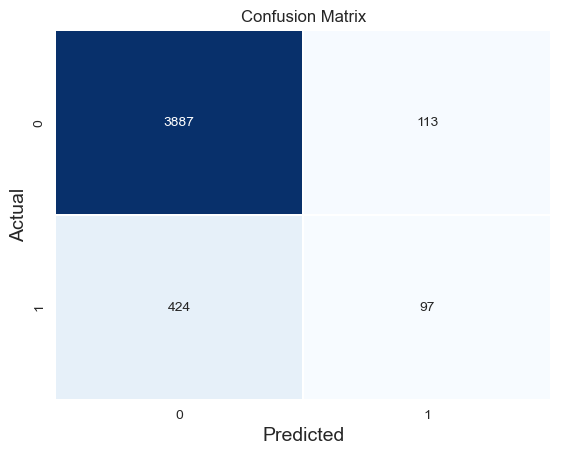

In [75]:
conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf, cmap='Blues', annot=True,fmt='d', linewidths=0.1,cbar=False)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')
plt.show()

**Print Classification Report**

In [76]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      4311
           1       0.19      0.46      0.27       210

    accuracy                           0.88      4521
   macro avg       0.58      0.68      0.60      4521
weighted avg       0.94      0.88      0.90      4521



#### **SVM Model**
[Link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [86]:
svc = SVC(C=15, kernel='poly')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [87]:
print("Train Accuracy: ", svc.score(X_train, y_train))
print("Test Accuracy: ",  accuracy_score(y_test, y_pred))

Train Accuracy:  0.8822808694160602
Test Accuracy:  0.8843176288431763


Hyper parameters:

- C=5, kernel='rbf'

    Train Accuracy:  0.8852459016393442

    Test Accuracy:  0.8865295288652952


- C=7, kernel='rbf'

    Train Accuracy:  0.8855644588203583

    Test Accuracy:  0.8867507188675072


- C=15, kernel='rbf'

    Train Accuracy:  0.8859810335955304

    Test Accuracy:  0.8863083388630834


- C=50, kernel='rbf'

    Train Accuracy:  0.8861770687838467

    Test Accuracy:  0.8847600088476001

$$\mathrm{Share \space your \space notebook \space on \space KAGGLE}$$
$$\mathrm{Best \space Wishes..♡}$$
